### Question 1

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Rank.txt', sep=' ', header=None)
df = df[df[1] == 'qid:4']
df.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,NaN
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,NaN
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,NaN
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,NaN
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,NaN


In [3]:
len(df)

103

In [4]:
# removing feature columns
df_reduce = df.iloc[:, :2]
df_reduce.columns = ['relevance', 'qid']
df_reduce.head()

,relevance,qid
0,0,qid:4
1,0,qid:4
2,0,qid:4
3,0,qid:4
4,1,qid:4


In [5]:
len(df_reduce)


103

In [6]:
#  Sort by relevance judgement scores to calculate maxDCG
df_maxDCG = df.sort_values(by=[0], ascending=False)
df_maxDCG.head()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,NaN
76,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9,NaN
40,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0,NaN
36,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047,NaN
90,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0,NaN


In [7]:
df_maxDCG.to_csv("maxDCG.csv")

In [8]:
# list of tuples, where the first element of the tuple denotes the relevance score and the second denotes its frequency

rel_list = list(df_maxDCG.loc[:, 0])
count_freq = [ (i,rel_list.count(i)) for i in set(rel_list) ]
print(count_freq)



[(0, 59), (1, 26), (2, 17), (3, 1)]


In [9]:
# no, of files with MaxDCG = 17! * 26! * 59!
import math
total_files = math.factorial(17) * math.factorial(26) * math.factorial(59)  # These many files are possible with MAX DCG score

In [10]:
print(total_files)

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [11]:
def DCG(scores, n):
    dcg = scores[0]
    for i in range(1,n):
        dcg += scores[i] / (math.log2(i+1))
    return dcg


rel_list = list(df_reduce.loc[:, 'relevance'])
rel_max_list = list(df_maxDCG.loc[:, 0])
dcg = DCG(rel_list, 50)
dcg_ideal = DCG(rel_max_list, 50)
dcg_dataset = DCG(rel_list, len(rel_list))
dcg_dataset_ideal = DCG(rel_max_list, len(rel_max_list))
print(f"DCG = {dcg}")
print(f"DCG_Max = {dcg_ideal}")
print(f"DCG_dataset = {dcg_dataset}")
print(f"DCG_Max_dataset = {dcg_dataset_ideal}")
print(f"NDCG is {dcg / dcg_ideal}")
print(f"NDCG for entire dataset is {dcg_dataset / dcg_dataset_ideal}")


DCG = 7.390580969258021
DCG_Max = 20.989750804831445
DCG_dataset = 12.550247459532576
DCG_Max_dataset = 20.989750804831445
NDCG is 0.3521042740324887
NDCG for entire dataset is 0.5979226516897831


In [12]:
y_pred_raw = list(df[76])
y_pred_raw = [e[3:] for e in y_pred_raw]
print(y_pred_raw)

['90.53171', '538.388954', '88.171761', '144.564444', '142.589323', '463.099129', '103.400313', '411.010633', '972.826451', '142.589323', '84.625987', '91.160998', '180.720002', '237.21632', '22.480108', '84.625987', '14.972391', '42.227139', '81.947653', '157.05992', '84.625987', '143.445062', '166.683125', '70.466293', '121.96152', '69.811973', '74.434086', '186.375414', '79.630746', '176.875026', '19.313312', '187.934366', '94.958714', '121.007996', '89.877389', '85.634253', '217.848266', '156.301965', '200.840161', '201.720933', '192.953467', '212.401296', '169.844071', '148.415271', '148.415271', '91.717534', '143.769297', '71.646268', '185.617459', '3.539923', '176.000104', '76.360315', '237.21632', '202.442155', '305.102064', '188.936782', '571.500533', '68.100494', '142.038637', '188.129935', '439.396463', '161.455583', '161.15638', '98.418404', '43.297629', '226.444023', '77.167163', '612.893205', '121.814843', '95.257458', '18.133337', '95.257458', '198.480212', '316.319283',

In [13]:
y_pred_raw = list(map(float, y_pred_raw))
y_pred_sort_raw = sorted(y_pred_raw, reverse=True)
print(y_pred_raw)

[90.53171, 538.388954, 88.171761, 144.564444, 142.589323, 463.099129, 103.400313, 411.010633, 972.826451, 142.589323, 84.625987, 91.160998, 180.720002, 237.21632, 22.480108, 84.625987, 14.972391, 42.227139, 81.947653, 157.05992, 84.625987, 143.445062, 166.683125, 70.466293, 121.96152, 69.811973, 74.434086, 186.375414, 79.630746, 176.875026, 19.313312, 187.934366, 94.958714, 121.007996, 89.877389, 85.634253, 217.848266, 156.301965, 200.840161, 201.720933, 192.953467, 212.401296, 169.844071, 148.415271, 148.415271, 91.717534, 143.769297, 71.646268, 185.617459, 3.539923, 176.000104, 76.360315, 237.21632, 202.442155, 305.102064, 188.936782, 571.500533, 68.100494, 142.038637, 188.129935, 439.396463, 161.455583, 161.15638, 98.418404, 43.297629, 226.444023, 77.167163, 612.893205, 121.814843, 95.257458, 18.133337, 95.257458, 198.480212, 316.319283, 81.140806, 85.805962, 108.548081, 75.987188, 84.625987, 177.168378, 200.840161, 3.539923, 140.479685, 84.625987, 292.184568, 180.24324, 14.972391, 

In [14]:
max = sorted(y_pred_raw, reverse=True)[0]
y_pred = [ele / max for ele in y_pred_raw]  # dividing by max value of feature 75
y_pred

[0.09306049389070323,
 0.5534275444983763,
 0.09063462543536453,
 0.14860250135201145,
 0.14657221013411775,
 0.476034680722307,
 0.10628855012495954,
 0.42249121883714075,
 1.0,
 0.14657221013411775,
 0.08698980883281925,
 0.09370735952573313,
 0.18576797723194308,
 0.24384238294112748,
 0.0231080353303428,
 0.08698980883281925,
 0.015390608452935661,
 0.043406651779043785,
 0.08423666206419793,
 0.16144700818789723,
 0.08698980883281925,
 0.14745185212896725,
 0.17133901409512556,
 0.07243459810078703,
 0.1253682194543865,
 0.07176200125750898,
 0.07651322178121983,
 0.19158135945873864,
 0.08185503788280526,
 0.181815601146725,
 0.01985278255967158,
 0.19318385700431578,
 0.09761115551739866,
 0.12438806107257049,
 0.09238789601949259,
 0.08802623829972321,
 0.22393332929636797,
 0.16066788155208167,
 0.20645014410694718,
 0.2073555183379774,
 0.19834315442559855,
 0.21833421139162673,
 0.17458825346022588,
 0.15256089187073305,
 0.15256089187073305,
 0.09427944100997722,
 0.1477851

In [15]:
y_true = [1 if ele > 0 else 0 for ele in list(df[0])]
y_true

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0]

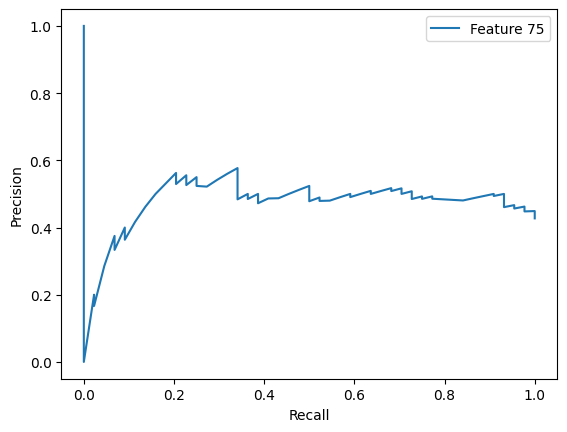

In [32]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
lr_precision, lr_recall, thresh = precision_recall_curve(y_true, y_pred)
pyplot.plot(lr_recall, lr_precision, label='Feature 75')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [39]:
import numpy as np
thresh = np.append(thresh, 1.0)
len(thresh)

87

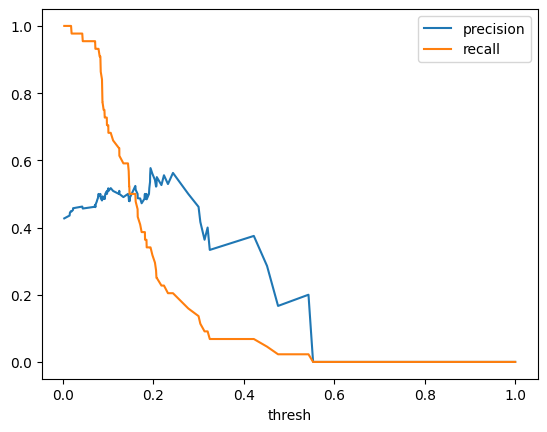

In [29]:
pyplot.plot(thresh, lr_precision, label='precision')
pyplot.plot(thresh, lr_recall, label='recall')
pyplot.xlabel('Threshold')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Threshold here refers to the value(normalised) of feature 75 above which the document is classified as relevant. 
# As the threshold decreases, the Recall increases (more and more documents are classified as relevant)
# Initially, the precision values change erattically, because the no. of documents are very less and every document 
# impacts the precision value heavily. But as the threshold decreases, more and more documents are classified as relevant
# and impact of inidvidual documents on precision decreases.

In [ ]:
y_true

In [ ]:
y_pred